In [129]:
import numpy as np
import scipy.constants as c
import scipy.stats as stats
from scipy.special import erf
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt 

In [133]:
T = 190 + 273.14 
pB = 82
l, d = 0.1, 0.32 
mu_s = c.value("Bohr magneton")
m = 39e-3 / c.N_A

N = 1e7

$f_v(v) = \left(\frac{m}{2 k_B T}\right)^{\frac32} 4{\sqrt\pi} v^2 e^{-\frac{mv^2}{2 k_B T}} $


In [131]:
def MB_CDF(v, m, T): # Maxwell-Bolzmann kulmulative Wahrscheinlichkeitsverteilung
    a = np.sqrt(c.k * T / m)
    return erf(v/(np.sqrt(2)*a)) - np.sqrt(2/np.pi) * v * np.exp(-v**2 / (2*a**2))/a

v = np.arange(0, 2000, 0.1)
cdf = MB_CDF(v, m, T)
inv_cdf = interp1d(cdf, v)

random_v_x = inv_cdf(stats.uniform.rvs(size=N))
v_z = mu_s * l /(m * random_v_x) * pB
z = 1/2 * (mu_s * l**2)/(m * random_v_x**2) *  pB + d * v_z / random_v_x 


<z''> = 0.00442
z'' mir höhster Wahrscheinlicheit = 0.000853


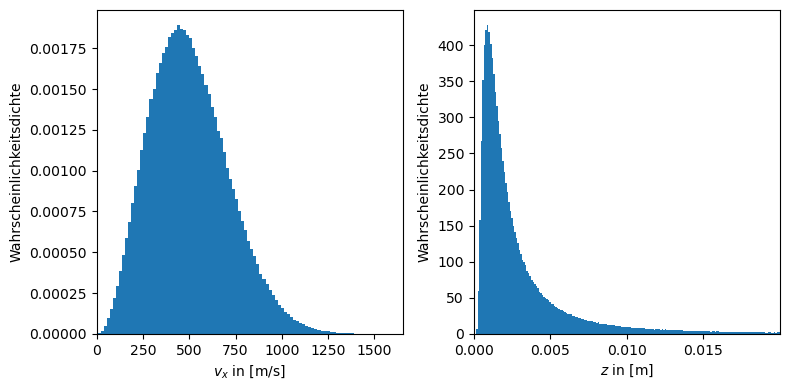

In [132]:
fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(8,4))

ax1.hist(random_v_x, bins=100, density=True)
ax1.set_xlim(0, max(random_v_x))
ax1.set_xlabel("$v_x$ in [m/s]")
ax1.set_ylabel("Wahrscheinlichkeitsdichte")

ax2.hist(z_:=z[z<2e-2],bins=200, density=True)
ax2.set_xlim(0, max(z_))
ax2.set_xlabel("$z$ in [m]")
ax2.set_ylabel("Wahrscheinlichkeitsdichte")

plt.tight_layout()
plt.savefig("5.svg")

n, edges = np.histogram(z_, 200)
print(f"<z''> = {np.mean(z):.3}")
print(f"z'' mir höhster Wahrscheinlicheit = {edges[np.argmax(n)]:.3}")
